,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
18,-1.000,6520.880,6489.885,4611.051,4588.951,1598.896,275.744,3105.010,1.901.252,ACCELERATE
19,-1.000,6520.880,6489.885,4611.051,4588.951,1598.896,2.757.449,3105.010,2.002.407,ACCELERATE
20,-1.000,6520.880,6489.885,4611.051,4588.951,1598.896,2.757.446,3105.010,2.100.557,ACCELERATE
21,-1.000,6520.880,6489.885,4611.051,4588.951,1598.896,2.757.448,3105.010,2.203.473,ACCELERATE
22,-1.000,6520.880,6489.885,4611.051,4588.951,1598.896,2.757.446,3105.010,2.303.166,ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
1820,1281.551,6454.105,1068.314,5797.755,3618.026,-4165.083,2.791.597,4454.146,3.010.171,LEFT_ACCELERATE
1821,1337.768,6209.239,9997.694,5524.345,3873.820,-4235.545,2.791.744,4321.133,3.020.294,LEFT_ACCELERATE
1822,1676.473,6253.637,8180.334,5308.517,3979.966,-4285.721,2.791.988,4181.615,3.030.281,LEFT_ACCELERATE
1823,-1.000,6672.732,6537.941,5271.104,3931.475,-430.980,2.792.129,4037.720,3.040.119,LEFT_ACCELERATE


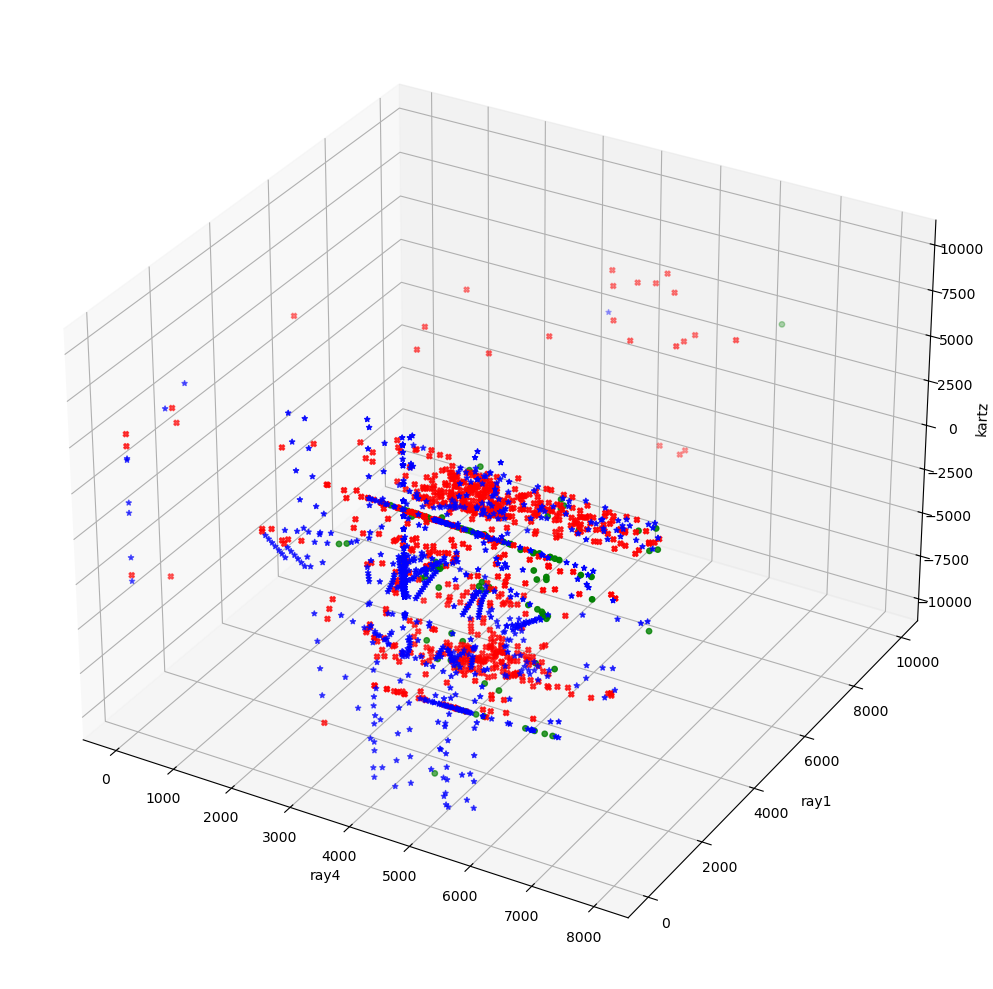

In [4]:
# Ejercicio 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from Utils import load_data_csv

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
gameData, X, y = load_data_csv("KartData.csv", x_columns, "action")
display(gameData)

df1 = pd.DataFrame(gameData, columns=x_columns)

scaling = StandardScaler()
scaling.fit(df1)
scaled_data = scaling.transform(df1)

principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

feature_weights_mapping = {}
for i, component in enumerate(principal.components_):
    component_feature_weights = zip(x_columns, component)
    sorted_feature_weight = sorted(component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
    feature_weights_mapping[i] = sorted_feature_weight

# En nuestro dataset, el número de clases es 3
# porque en ningún momento deceleramos (BRAKE)
label1 = feature_weights_mapping[0][0][0]
label2 = feature_weights_mapping[1][0][0]
label3 = feature_weights_mapping[2][0][0]

left_accelerate_pc1 = gameData[label1][y == "LEFT_ACCELERATE"]
right_accelerate_pc1 = gameData[label1][y == "RIGHT_ACCELERATE"]
accelerate_pc1 = gameData[label1][y == "ACCELERATE"]
left_accelerate_pc2 = gameData[label2][y == "LEFT_ACCELERATE"]
right_accelerate_pc2 = gameData[label2][y == "RIGHT_ACCELERATE"]
accelerate_pc2 = gameData[label2][y == "ACCELERATE"]
left_accelerate_pc3 = gameData[label3][y == "LEFT_ACCELERATE"]
right_accelerate_pc3 = gameData[label3][y == "RIGHT_ACCELERATE"]
accelerate_pc3 = gameData[label3][y == "ACCELERATE"]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(left_accelerate_pc1, left_accelerate_pc2, left_accelerate_pc3, c='red', marker='X', s=15)
ax.scatter(right_accelerate_pc1, right_accelerate_pc2, right_accelerate_pc3, c='green', marker='o', s=15)
ax.scatter(accelerate_pc1, accelerate_pc2, accelerate_pc3, c='blue', marker='*', s=15)
ax.set_xlabel(label1)
ax.set_ylabel(label2)
ax.set_zlabel(label3)

plt.tight_layout()
plt.savefig("ejercicio2.png")
plt.show()

MLP 2 hidden layers accuracy: 0.7427597955706985
MLP accuracy: 0.7597955706984668
SKlearn accuracy: 0.7461669505962522
SKlearn modified accuracy: 0.7546848381601363
KNN accuracy: 0.7308347529812607
Decision Tree accuracy: 0.7001703577512777
Random Forest accuracy: 0.7308347529812607


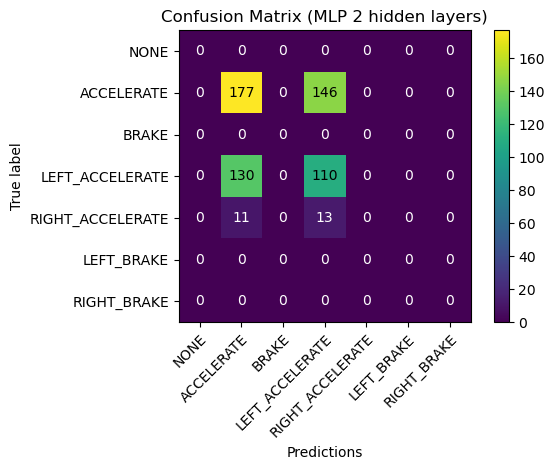

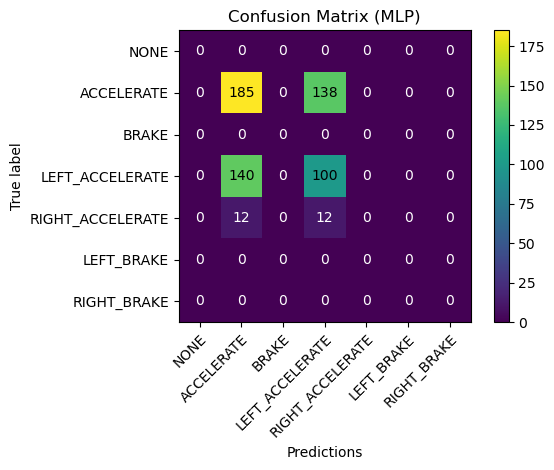

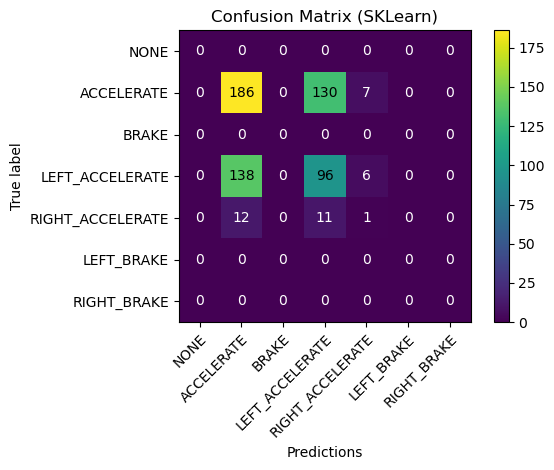

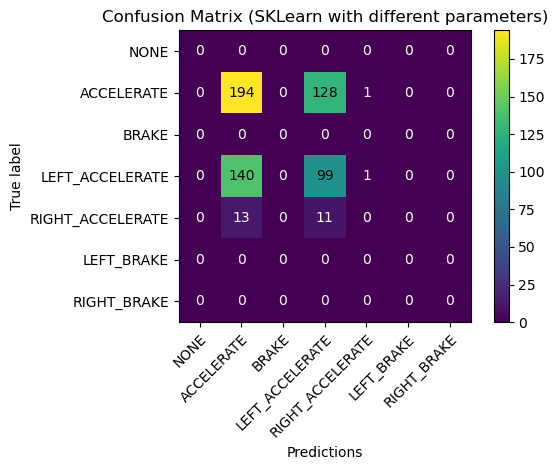

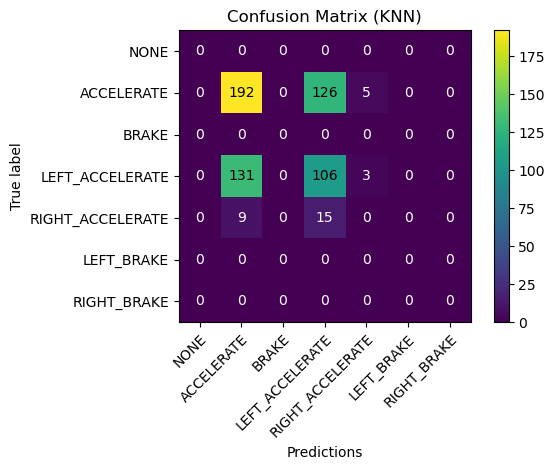

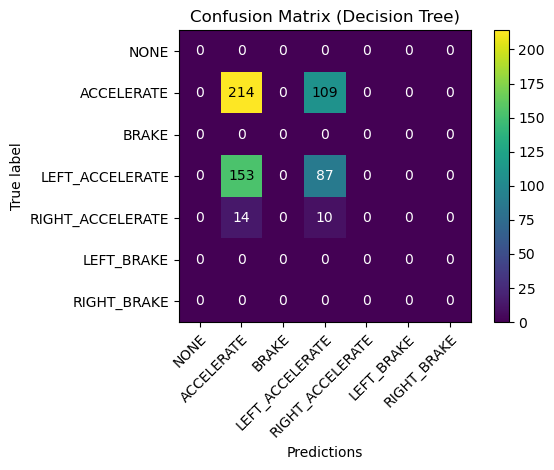

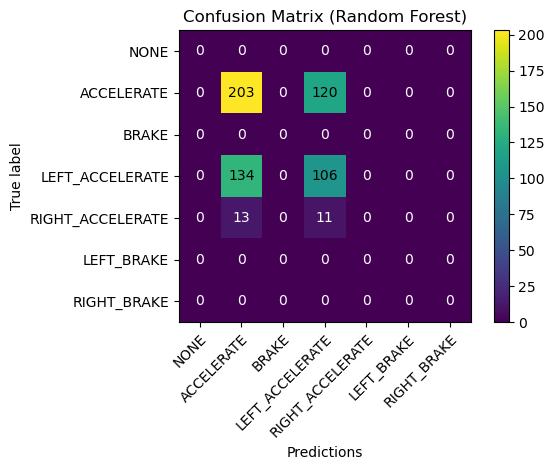

In [5]:
# Ejercicio 4
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from Utils import load_data_csv,one_hot_encoding,accuracy,calculateConfusionMatrix,drawConfusionMatrix
from MLP_Complete import MLP_Complete

label_mapping = {
    0: "NONE",
    1: "ACCELERATE",
    2: "BRAKE",
    3: "LEFT_ACCELERATE",
    4: "RIGHT_ACCELERATE",
    5: "LEFT_BRAKE",
    6: "RIGHT_BRAKE",
}
label_mapping_inverse = {
    "NONE": 0,
    "ACCELERATE": 1,
    "BRAKE": 2,
    "LEFT_ACCELERATE": 3,
    "RIGHT_ACCELERATE": 4,
    "LEFT_BRAKE": 5,
    "RIGHT_BRAKE": 6
}

label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
kartData, X, y = load_data_csv("KartData.csv", x_columns, "action")

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X).T

# Split de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)
yEnc = one_hot_encoding(np.array(y_train),[label_array])
y_numbers = [label_mapping_inverse[label] for label in np.array(y)]

# Apartado 1
# Hiperparámetros para 2 capas ocultas
alpha_2 = 0.6 # learning rate
lambda_2 = 0.0
numiters_2 = 2200
hidden_layers_sizes_2 = [9,7]

# Perceptrón multicapa de implementación propia con más de 3 capas
mlpc_2 = MLP_Complete(X_train.shape[1],hidden_layers_sizes_2,yEnc.shape[1])
Jhistory_2 = mlpc_2.backpropagation(X_train,yEnc,alpha_2,lambda_2,numiters_2)
a1_2,ai_2,zi_2 = mlpc_2.feedforward(X_test)
y_pred_mlpc_2 = mlpc_2.predict(ai_2[len(ai_2) - 1])
y_pred_mlpc_labels_2 = [label_mapping[label] for label in y_pred_mlpc_2]

# Comprobación de resultados
accuracy_mlpc_2 = accuracy(y_test,y_pred_mlpc_labels_2)
print("MLP 2 hidden layers accuracy: " + str(accuracy_mlpc_2))

# Apartado 2
# Hiperparámetros para una única capa oculta
alpha_ = 0.5 # learning rate
lambda_ = 0.0
numiters_ = 2200
hidden_layers_sizes_ = [7]

# Perceptrón multicapa de implementación propia con una única capa
mlpc = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
Jhistory = mlpc.backpropagation(X_train,yEnc,alpha_,lambda_,numiters_)
a1,ai,zi = mlpc.feedforward(X_test)
y_pred_mlpc = mlpc.predict(ai[len(ai) - 1])
y_pred_mlpc_labels = [label_mapping[label] for label in y_pred_mlpc]

# Perceptrón multicapa de SKlearn
mlp = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_),activation='logistic',alpha=lambda_,learning_rate='constant',learning_rate_init=alpha_,max_iter=numiters_,random_state=0,epsilon=0.12)
mlp.fit(X_train,y_train)
y_pred_sklearn = mlp.predict(X_test)
y_pred_sklearn_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn]

# Comprobación de resultados para una única capa oculta 
accuracy_mlpc = accuracy(y_test,y_pred_mlpc_labels)
print("MLP accuracy: " + str(accuracy_mlpc))
accuracy_sklearn = accuracy(y_test,y_pred_sklearn)
print("SKlearn accuracy: " + str(accuracy_sklearn))

# Apartado 3
# SKLearn con distintos parámetros
skalpha = 1.0
sklearningrate = 0.25
skiters = 1850
mlp_2 = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_2),activation='relu',alpha=skalpha,learning_rate='adaptive',solver='sgd',learning_rate_init=sklearningrate,max_iter=skiters,random_state=0,epsilon=0.12)
mlp_2.fit(X_train,y_train)
y_pred_sklearn_2 = mlp_2.predict(X_test)
y_pred_sklearn_2_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn_2]

# Comprobación de resultados
accuracy_sklearn_2 = accuracy(y_test,y_pred_sklearn_2)
print("SKlearn modified accuracy: " + str(accuracy_sklearn_2))

# Apartado 4
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_numbers = [label_mapping_inverse[label] for label in y_pred_knn]

# Comprobación de resultados
accuracy_knn = accuracy(y_test,y_pred_knn)
print("KNN accuracy: " + str(accuracy_knn))

# Apartado 5
# Modelo de árbol de decisión 
decisiontree = DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=20,max_features=7)
decisiontree.fit(X_train,y_train)
y_pred_tree = decisiontree.predict(X_test)
y_pred_tree_numbers = [label_mapping_inverse[label] for label in y_pred_tree]

# Comprobación de resultados
accuracy_decisontree = accuracy(y_test,y_pred_tree)
print("Decision Tree accuracy: " + str(accuracy_decisontree))

# Modelo Random Forest
randomforest = RandomForestClassifier(n_estimators=80,max_depth=9,max_leaf_nodes=9)
randomforest.fit(X_train,y_train)
y_pred_forest = randomforest.predict(X_test)
y_pred_forest_numbers = [label_mapping_inverse[label] for label in y_pred_forest]

# Comprobación de resultados
accuracy_forest = accuracy(y_test,y_pred_forest)
print("Random Forest accuracy: " + str(accuracy_forest))

# Apartado 6
# Matrices de Confusión
# Perceptrón multicapa de implementación propia con más de 3 capas
matrix_mlpc_2 = calculateConfusionMatrix(yEnc,y_pred_mlpc_2,y_numbers)
drawConfusionMatrix(matrix_mlpc_2,label_array,label_array,"ejercicio4_mlpc_2.png",title="Confusion Matrix (MLP 2 hidden layers)")

# Perceptrón multicapa de implementación propia con una única capa
matrix_mlpc = calculateConfusionMatrix(yEnc,y_pred_mlpc,y_numbers)
drawConfusionMatrix(matrix_mlpc,label_array,label_array,"ejercicio4_mlpc.png",title="Confusion Matrix (MLP)")

# Perceptrón multicapa de SKlearn
matrix_sklearn = calculateConfusionMatrix(yEnc,y_pred_sklearn_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn,label_array,label_array,"ejercicio4_sklearn.png",title="Confusion Matrix (SKLearn)")

# SKLearn con distintos parámetros
matrix_sklearn_2 = calculateConfusionMatrix(yEnc,y_pred_sklearn_2_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn_2,label_array,label_array,"ejercicio4_sklearn_2.png",title="Confusion Matrix (SKLearn with different parameters)")

# Modelo KNN
matrix_knn = calculateConfusionMatrix(yEnc,y_pred_knn_numbers,y_numbers)
drawConfusionMatrix(matrix_knn,label_array,label_array,"ejercicio4_knn.png",title="Confusion Matrix (KNN)")

# Modelo de árbol de decisión
matrix_decisiontree = calculateConfusionMatrix(yEnc,y_pred_tree_numbers,y_numbers)
drawConfusionMatrix(matrix_decisiontree,label_array,label_array,"ejercicio4_tree.png",title="Confusion Matrix (Decision Tree)")

# Modelo Random Forest
matrix_randomforest = calculateConfusionMatrix(yEnc,y_pred_forest_numbers,y_numbers)
drawConfusionMatrix(matrix_randomforest,label_array,label_array,"ejercicio4_randomforest.png",title="Confusion Matrix (Random Forest)")


## Apartado 6

> Explica qué modelo crees que se adapta mejor al juego y cuál elegirías

El modelo que se adapta mejor al juego es nuestro perceptrón multicapa de una única capa con un _accuracy_ del 0.7597955706984668 (75.98%).

Tras eliminar del dataset los parámetros "time" y "karty" que resultaban parámetros irrelevantes, nos quedamos con 7 características. Esto conlleva a que los modelos más complejos como los árboles de decisión o Random Forest sean "malos" porque hay pocas características, pocos datos y, además, están muy esparcidos.

Descartamos los modelos KNN porque no son capaces de encontrar las relaciones más complejas que hay entre inputs y outputs y son ligeramente más lentos que un modelo MLP. La principal diferencia es que los resultados que hay en una red de KNN suelen tener menor varianza y como en este juego en concreto el movimiento del coche sufre pequeñas correciones (se utiliza RIGHT_ACCELERATE aunque todos los giros sean hacia la izquierda), los resultados de un modelo KNN serían una lista de movimientos más homogéneos donde se podría omitir alguna de estas correcciones.

Como ya avisa el enunciado, con pocos datos y pocas características, aplicarle más capas ocultas no tendría mucho sentido porque estaríamos haciendo sobreingeniería dando a entender que directamente con una capa oculta ya funciona similar al problema con los modelos más complejos. Además, añadirle una capa oculta a la red de neuronas aumenta la complejidad del modelo lo que hace que encontrar los hiperparámetros más ideales sea mucho más complicado.

Se puede apreciar que nuestro perceptrón y sklearn con solo una única capa oculta dan resultados muy similares entre sí, la diferencia entre ellos es trivial ya que son modelos prácticamente idénticos salvo por las optimizaciones usadas en SKlearn que usa _adam_ y en la de modificada de SKlearn con la función de activación _reLu_.

## Apartado 7

> Itera entre los modelos, sus hiperparámetros, los datos exportados y la
> limpieza de los mismos, así como el número de ejemplos de entrenamiento
> hasta conseguir modelos con el mejor rendimiento teórico posible

Para perfeccionar los datos de los modelos, como se ha dicho en el anterior apartado, hemos descartado los parámetros de "time" y "karty" irrelevantes. Además, hemos notado de algunos de los datos les faltaban dígitos de precisión que hemos corregido en `cleanData` para añadirle un `0` al final si eran menos de 7 caracteres (6 dígitos + "."). Luego, las filas que contenían acciones `NONE` también fueron descartadas porque se trataban de situaciones en las que el coche normalmente debería acelerar, pero al estar en las primeras o las últimas milésimas de segundo de la partida, todavía no habíamos la `W` o ya nos habíamos retirado de los controles del juego respectivamente.

Para todos los modelos hemos probado a establecer un máximo número de iteraciones entre 1400, 1600, 1800, 1850, 2000, 2200 y 2400, escogiendo finalmente la que daba un _accuracy_ más alto en cada modelo.
Repetimos un proceso similar para los valores de _alpha_ y _lambda_ en los modelos no modificados. Observamos que para un valor de _lambda_ != 0, el _accuracy_ disminuía considerablemente; sin aplicar regularización siempre obteníamos un mejor resultado. Y, para _alpha_, hemos buscado un punto de equilibrio.

In [6]:
# Ejercicio 5
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from Utils import load_data_csv,one_hot_encoding,WriteStandardScaler,export_to_txt_custom
from MLP_Complete import MLP_Complete

# Exportar StandardScaler propio
x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz"]
gameData, X, y = load_data_csv("KartData.csv", x_columns, "action")
df1 = pd.DataFrame(gameData, columns=x_columns)
mean = np.array(df1.mean(axis=0))
var = np.array(df1.var(axis=0))
WriteStandardScaler("ScalerPropio.txt", mean, var)

# Exportar modelo propio
label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

scaler = StandardScaler()
X = scaler.fit_transform(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)
yEnc = one_hot_encoding(np.array(y_train),[label_array])

hidden_layers_sizes_ = [7]

model = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
export_to_txt_custom(model,"modelPropio.txt")